<a href="https://colab.research.google.com/github/varun2321/dv-assignment/blob/main/PARIS_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VISUALIZING PARKING SPACES ON A MAP**

1.Importing libraries:

In this code, two libraries are used

geopandas to load a GeoJSON dataset
folium to create an interactive map

*   json to load a GeoJSON dataset
*   folium to create an interactive map

2.Load GeoJSON data:

   The 'with open' statement opens the specified GeoJSON file in read mode ('r').
   The 'json.load(f)' method parses the contents of the file and loads it into a Python data structure.
   The variable 'data' now contains the GeoJSON data in a format that can be used in Python.

3.Adding markers:

  Creates markers for parking spaces with their names on a Folium map.
 It checks if the feature geometry is a point and extracts coordinates and name information from the GeoJSON properties.
 A red marker is added to the map at the specified coordinates, displaying the name as a popup.






In [ ]:
!pip install folium

import folium
import json

# Load the GeoJSON data
with open('/content/export.geojson') as f:
    data = json.load(f)

# Create a map centered at a specific location
map = folium.Map(location=[48.853, 2.35], zoom_start=13)

# Iterate over the features and add markers with names for parking spaces
for feature in data['features']:
    if feature['geometry']['type'] == 'Point':
        coordinates = feature['geometry']['coordinates']
        name = feature.get('properties', {}).get('name', 'Parking Space')
        folium.Marker(location=[coordinates[1], coordinates[0]], popup=name, icon=folium.Icon(color='red')).add_to(map)

# Display the map
map


**VISUALIZING PARKING SPACE ON A CHART**

1.Importing Libraries:

The two main libraries used here are,


*   Geopandas
*   Matplotlib

2.Loading GeoJSON:

This line utilizes the GeoPandas read_file function to read the GeoJSON file or shapefile located at the specified file_path into a GeoDataFrame (gdf).

3.Counting Parking Types:

The script then iterates through the features in the GeoDataFrame, checking for the presence of the 'amenity' key with a value of 'parking'. It categorizes parking spaces into two types: 'surface' for street parking and 'multi-storey' for dedicated parking lots.

4.Creating Chart:

Lastly, the code generates a bar chart and pie chart to illustrate the count of parking spaces for both street parking and dedicated parking lots.







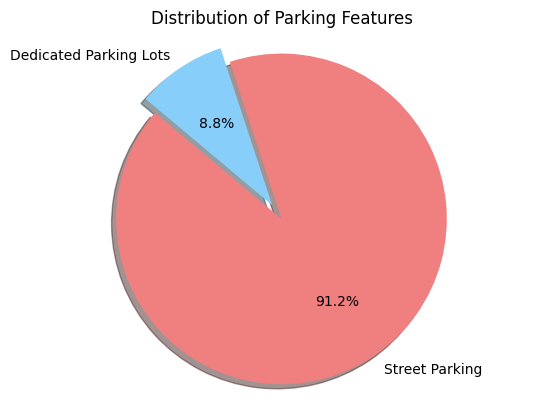

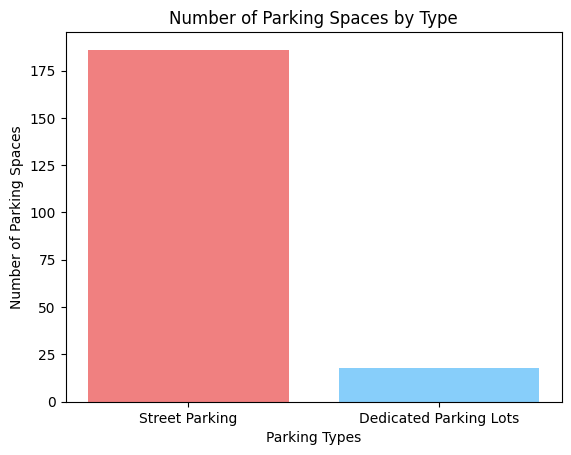

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Replace 'your_file_path' with the actual path to your GeoJSON file or shapefile
file_path = '/content/export.geojson'
gdf = gpd.read_file(file_path)

# Initialize counters for street parking and dedicated parking lots
street_parking_count = 0
dedicated_parking_count = 0

# Iterate over the features and count the types of parking features
for index, feature in gdf.iterrows():
    if 'amenity' in feature and feature['amenity'] == 'parking':
        if 'parking' in feature and feature['parking'] == 'surface':
            street_parking_count += 1
        elif 'parking' in feature and feature['parking'] == 'multi-storey':
            dedicated_parking_count += 1

# Pie chart for the type of parking features
labels = ['Street Parking', 'Dedicated Parking Lots']
sizes = [street_parking_count, dedicated_parking_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Parking Features')
plt.show()

# Bar chart for the count of parking spaces
categories = ['Street Parking', 'Dedicated Parking Lots']
counts = [street_parking_count, dedicated_parking_count]
plt.bar(categories, counts, color=['lightcoral', 'lightskyblue'])
plt.xlabel('Parking Types')
plt.ylabel('Number of Parking Spaces')
plt.title('Number of Parking Spaces by Type')
plt.show()
